In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('cars24-car-price-clean.csv')

In [3]:
df.head()

,selling_price,year,km_driven,mileage,engine,max_power,age,make,model,Individual,Trustmark Dealer,Diesel,Electric,LPG,Petrol,Manual,5,>5
0,-1.111046,-0.801317,1.195828,0.045745,-1.310754,-1.157780,0.801317,-0.433854,-1.125683,1.248892,-0.098382,-0.985275,-0.020095,-0.056917,1.024622,0.495818,0.444503,-0.424728
1,-0.223944,0.450030,-0.737872,-0.140402,-0.537456,-0.360203,-0.450030,-0.327501,-0.333227,1.248892,-0.098382,-0.985275,-0.020095,-0.056917,1.024622,0.495818,0.444503,-0.424728
2,-0.915058,-1.426990,0.035608,-0.582501,-0.537456,-0.404885,1.426990,-0.327501,-0.789807,1.248892,-0.098382,-0.985275,-0.020095,-0.056917,1.024622,0.495818,0.444503,-0.424728
3,-0.892365,-0.801317,-0.409143,0.329620,-0.921213,-0.693085,0.801317,-0.433854,-0.905265,1.248892,-0.098382,-0.985275,-0.020095,-0.056917,1.024622,0.495818,0.444503,-0.424728
4,-0.182683,0.137194,-0.544502,0.760085,0.042999,0.010435,-0.137194,-0.246579,-0.013096,-0.800710,-0.098382,1.014945,-0.020095,-0.056917,-0.975970,0.495818,0.444503,-0.424728


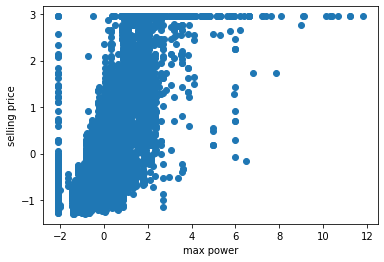

In [4]:
# define X and y
X = df['max_power'].values
Y = df['selling_price'].values

plt.scatter(X,Y)
plt.xlabel("max power")
plt.ylabel("selling price")
plt.show()

In [5]:
def univariate_linear_hypothesis(x, theta):
    y_hat = theta[0] + theta[1]* x
    return y_hat

In [6]:
def cost(X,Y,theta):
    m = X.shape[0] # number of training examples
    total_error = 0.0
    for i in range(m):
        y_ = univariate_linear_hypothesis(X[i],theta)
        total_error += (y_ - Y[i]**2)
    return (total_error/m)

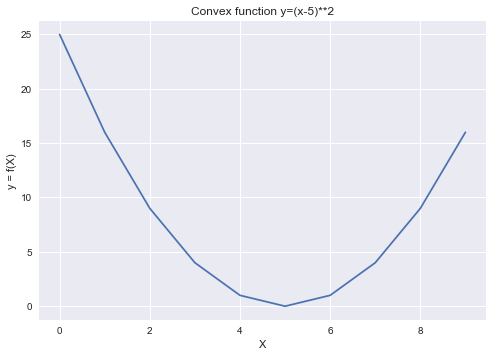

In [7]:
X = np.arange(10)
Y = (X-5)**2  # x = 5  cost function will give minimum(0)
plt.style.use("seaborn")
plt.plot(X,Y)
plt.ylabel("y = f(X)")
plt.xlabel("X")
plt.title("Convex function y=(x-5)**2")  # assume ground truth value is 5
plt.show()

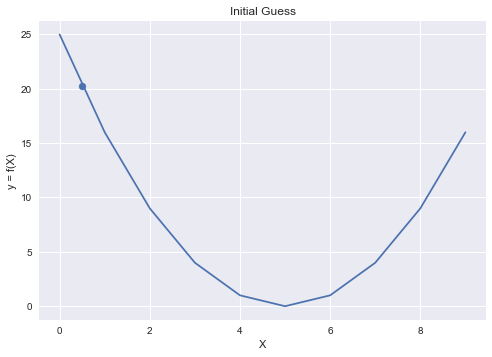

In [8]:
x = 0.5
y = (x-5)**2
plt.plot(X,Y)
plt.scatter(x,y)
plt.ylabel("y = f(X)")
plt.xlabel("X")
plt.title("Initial Guess")
plt.show()

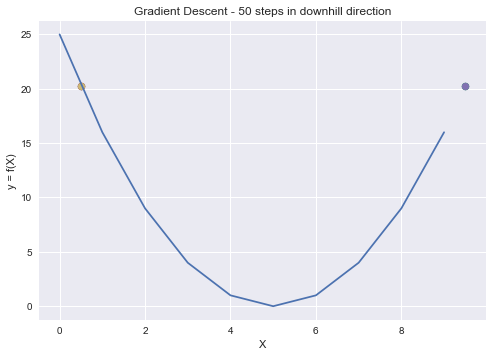

In [12]:
import time
fig = plt.figure()
ax = fig.add_subplot(111)
plt.ion()

x = 0.5
y = (x-5)**2
plt.plot(X,Y)
plt.scatter(x,y)
plt.ylabel("y = f(X)")
plt.xlabel("X")
plt.title("Gradient Descent - 50 steps in downhill direction")

lr = 0.1
errors = []
# 10 steps in downhill direction
for i in range(10):
    grad = 2*(x-5)
    x = x - grad
    y = (x-5)**2
    error = y - 0
    errors.append(error)
    plt.scatter(x,y)
    fig.canvas.draw()
    time.sleep(0.5)
plt.show()

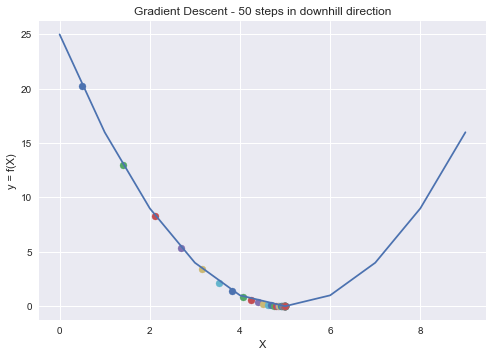

In [15]:
import time
fig = plt.figure()
ax = fig.add_subplot(111)
plt.ion()

x = 0.5
y = (x-5)**2
plt.plot(X,Y)
plt.scatter(x,y)
plt.ylabel("y = f(X)")
plt.xlabel("X")
plt.title("Gradient Descent - 50 steps in downhill direction")

lr = 0.1
errors = []
# 10 steps in downhill direction
for i in range(50):
    grad = 2*(x-5)
    x = x - lr*grad
    y = (x-5)**2
    error = y - 0
    errors.append(error)
    plt.scatter(x,y)
    fig.canvas.draw()
    time.sleep(0.5)
plt.show()

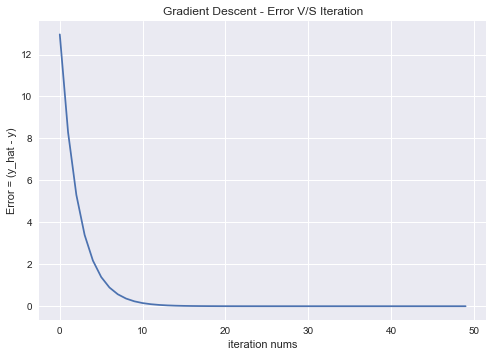

In [16]:
plt.plot(errors)
plt.xlabel("iteration nums")
plt.ylabel("Error = (y_hat - y)")
plt.title("Gradient Descent - Error V/S Iteration")
plt.show()

In [18]:
X = df["max_power"].values
Y = df["selling_price"].values

In [19]:
def hypothesis(x,theta):
    y_hat = theta[0] + theta[1]*x
    return y_hat

In [21]:
def gradient(X,Y,theta):
    m = X.shape[0]
    grad = np.zeros((2,))
    for i in range(m):
        x = X[i]
        y_hat = hypothesis(x,theta)
        y = Y[i]
        grad[0] += (y_hat - y)
        grad[1] += (y_hat - y)*x
    return grad/m

In [22]:
def error(X,Y,theta):
    m = X.shape[0]
    total_error = 0.0
    for i in range(m):
        y_hat = hypothesis(X[i],theta)
        total_error += (y_hat - Y[i])**2
    return (total_error/m)

In [25]:
def gradient_descent(X,Y,max_steps=100,learning_rate=0.1):
    theta = np.zeros((2,))
    error_list = []
    theta_list = []

    for i in range(max_steps):
        # compute grad
        grad = gradient(X,Y,theta)
        e = error(X,Y,theta)

        #update theta
        theta[0] = theta[0] - learning_rate*grad[0]
        theta[1] = theta[1] - learning_rate*grad[1]
        #storing the theta values during updates
        theta_list.append((theta[0],theta[1]))
        error_list.append(e)

    return theta,error_list,theta_list

In [26]:
theta,error_list,theta_list = gradient_descent(X,Y,max_steps=50)
print(theta)

[-1.65567750e-16  7.66419438e-01]


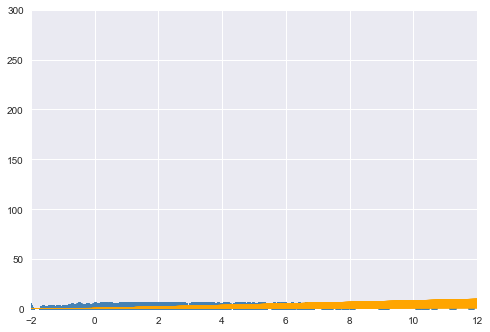

In [28]:
import time
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111)
plt.ion()

for intercept, slope in theta_list:
    # plot a line from slope and intercept
    ax.set_xlim([-2,12])
    ax.set_ylim([0,300])
    x_vals = np.array(ax.get_xlim())
    y_vals = intercept + slope * x_vals
    ax.scatter(X, Y, color="steelblue")
    ax.plot(x_vals, y_vals, color='orange')
    fig.canvas.draw()
    time.sleep(0.5)
plt.show()

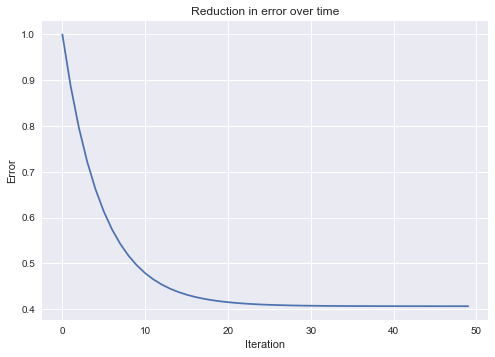

In [29]:
fig = plt.figure()
plt.plot(error_list)
plt.title("Reduction in error over time")
plt.xlabel("Iteration")
plt.ylabel("Error")
plt.show()

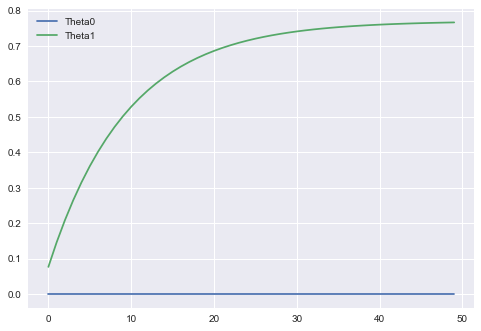

In [30]:
fig = plt.figure()
ax = fig.add_subplot(111)
theta_list = np.array(theta_list)
plt.plot(theta_list[:,0], label="Theta0")
plt.plot(theta_list[:,1], label="Theta1")
plt.legend()
plt.show()

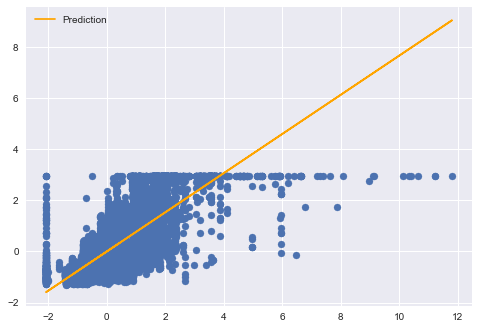

In [31]:
fig = plt.figure()
Y_hat = hypothesis(X,theta)
plt.scatter(X,Y)
plt.plot(X,Y_hat,color='orange',label="Prediction")
plt.legend()
plt.show()

In [32]:
def r2_score(Y,Y_hat):
    num = np.sum((Y-Y_hat)**2)
    denom = np.sum((Y-Y.mean())**2)
    score = (1 - num/denom)
    return score

In [33]:
r2_score(Y,Y_hat)

0.5934847638275064

C:\Users\suman\AppData\Local\Temp\ipykernel_20452\1375158518.py:12: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  axes = fig.gca(projection='3d')


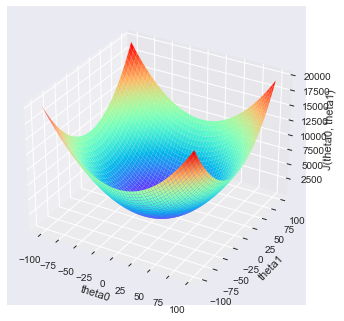

In [37]:
T0 = np.arange(-100,100,1)
T1 = np.arange(-100,100,1)

T0,T1 = np.meshgrid(T0,T1)
J = np.zeros(T0.shape)
for i in range(J.shape[0]):
    for j in range(J.shape[1]):
        Y_hat =  T1[i,j]*X + T0[i,j]
        J[i,j] = np.sum((Y- Y_hat)**2)/Y.shape[0]

fig = plt.figure()
axes = fig.gca(projection='3d')
axes.plot_surface(T0,T1,J, cmap="rainbow")
axes.set_xlabel("theta0")
axes.set_ylabel("theta1")
axes.set_zlabel("J(theta0, theta1)")
plt.show()

In [38]:
from sklearn.linear_model import LinearRegression

In [39]:
print(X.shape)
print(Y.shape)

(19820,)
(19820,)


In [41]:
X = X.reshape(X.size,1)
Y = Y.reshape(Y.size,1)

In [43]:
model = LinearRegression()

In [44]:
model.fit(X,Y)

LinearRegression()

In [45]:
model.intercept_

array([-1.56382574e-16])

In [46]:
model.coef_

array([[0.77038985]])

In [47]:
model.score(X,Y)

0.5935005280317714

In [50]:
output = model.predict(X)

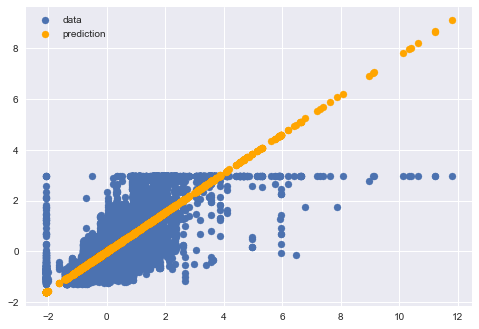

In [51]:
fig = plt.figure()
plt.scatter(X,Y,label='data')
plt.scatter(X,output,color='orange',label='prediction')
plt.legend()
plt.show()